In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import cities data frames

In [2]:
tlv_apartments = pd.read_csv('./data/madlan_apartments_telaviv.csv', encoding="utf-8-sig")
tlv_tags = pd.read_csv('./data/madlan_tags_telaviv.csv', encoding="utf-8-sig")
tlv_images = pd.read_csv('./data/madlan_images_telaviv.csv', encoding="utf-8-sig")
tlv_insight = pd.read_csv('./data/madlan_insights_telaviv.csv', encoding="utf-8-sig")

In [3]:
haifa_apartments = pd.read_csv('./data/madlan_apartments_haifa.csv', encoding="utf-8-sig")
haifa_tags = pd.read_csv('./data/madlan_tags_haifa.csv', encoding="utf-8-sig")
haifa_images = pd.read_csv('./data/madlan_images_haifa.csv', encoding="utf-8-sig")
haifa_insight = pd.read_csv('./data/madlan_insights_haifa.csv', encoding="utf-8-sig")

In [4]:
jerusalem_apartments = pd.read_csv('./data/madlan_apartments_jerusalem.csv', encoding="utf-8-sig")
jerusalem_tags = pd.read_csv('./data/madlan_tags_jerusalem.csv', encoding="utf-8-sig")
jerusalem_images = pd.read_csv('./data/madlan_images_jerusalem.csv', encoding="utf-8-sig")
jerusalem_insight = pd.read_csv('./data/madlan_insights_jerusalem.csv', encoding="utf-8-sig")

# Append dfs

In [5]:
apartments = pd.concat([tlv_apartments, jerusalem_apartments, haifa_apartments])

In [6]:
tags = pd.concat([tlv_tags, jerusalem_tags, haifa_tags])

In [7]:
images = pd.concat([tlv_images, jerusalem_images, haifa_images])

In [8]:
insight = pd.concat([tlv_insight, jerusalem_insight, haifa_insight])

### DF.head()

In [9]:
apartments.head()

,id,lat,lng,create_date,address,floor,deal_type,beds,baths,price,size_m^2,condition,url
0,g0umkhkigKb,31.905182,34.823404,2022-05-10 10:37:08,"פרופ' כהנמן דניאל 1, רחובות",6.0,למכירה,5.0,NaN,3340000,130.0,משופץ,https://www.madlan.co.il/listings/g0umkhkigKb
1,ieVNwuOX98B,32.078710,34.781594,2023-12-20 10:26:49,"מאנה 15, תל אביב יפו",2.0,להשכרה,3.0,NaN,10000,70.0,כמו חדש,https://www.madlan.co.il/listings/ieVNwuOX98B
2,kRYP2kIMVho,32.093788,34.799702,2023-12-20 10:35:53,"בבלי 6, תל אביב יפו",3.0,להשכרה,5.0,NaN,12300,120.0,משופץ,https://www.madlan.co.il/listings/kRYP2kIMVho
3,bk4LlhcSrQI,32.089574,34.796605,2023-12-20 11:02:39,"אלוני ניסים 13, תל אביב יפו",14.0,להשכרה,4.0,NaN,13000,170.0,כמו חדש,https://www.madlan.co.il/listings/bk4LlhcSrQI
4,cTRw7SDpf1E,32.046710,34.809844,2023-12-20 11:25:50,"שדרות ששת הימים 13, תל אביב יפו",0.0,להשכרה,3.0,NaN,4800,85.0,משופץ,https://www.madlan.co.il/listings/cTRw7SDpf1E


In [10]:
images.head()

,id,image_url
0,gBxSkU3fU6h,https://images2.madlan.co.il/t:nonce:v=2;resiz...
1,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
2,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
3,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
4,ct0ECL7b1HG,https://images2.madlan.co.il/t:nonce:v=2;resiz...


In [11]:
tags.head()

,id,tag_category,tag_value
0,gBxSkU3fU6h,דירוג בתי ספר,0.0
1,gBxSkU3fU6h,התאמה לחילונים,0.0
2,gBxSkU3fU6h,התאמה לדתיים,1.0
3,gBxSkU3fU6h,ביטחון,NaN
4,gBxSkU3fU6h,קירבה לפארקים,1.0


In [12]:
insight.head()

,id,insight_category,insight_value,insight_values
0,gBxSkU3fU6h,livability,NaN,"בילויים, קניות וסידורים במרחק הליכה קצרה"
1,gBxSkU3fU6h,nuisances,NaN,הקמת המטרו תגרום למטרדי בנייה באזור
2,gBxSkU3fU6h,planning,NaN,רובע עירוני חדש יקום בפי גלילות
3,gBxSkU3fU6h,transportation,NaN,גשר מתוכנן יקשר לאזורי חן ולים
4,gBxSkU3fU6h,transportation,NaN,צפוי שיפור בשבילי האופניים באזור


## Working on Apartments

In [13]:
apartments.isnull().sum().sum()

7002

In [14]:
# filling na values with mean value per dealtype

avg_price_for_sale = int(round(apartments[apartments.deal_type=="למכירה"]["price"].mean(),0))
avg_price_for_rent = int(round(apartments[apartments.deal_type=="להשכרה"]["price"].mean(),0))

avg_size_for_sale = int(round(apartments[apartments.deal_type=="למכירה"]["size_m^2"].mean(),0))
avg_size_for_rent = int(round(apartments[apartments.deal_type=="להשכרה"]["size_m^2"].mean(),0))

avg_beds_for_sale = int(round(apartments[apartments.deal_type=="למכירה"]["beds"].mean(),0))
avg_beds_for_rent = int(round(apartments[apartments.deal_type=="להשכרה"]["beds"].mean(),0))


avg_floor_for_sale = int(round(apartments[apartments.deal_type=="למכירה"]["floor"].mean(),0))
avg_floor_for_rent = int(round(apartments[apartments.deal_type=="להשכרה"]["floor"].mean(),0))

In [15]:
apartments.loc[apartments.deal_type=="למכירה", "price"] = apartments.loc[apartments.deal_type=="למכירה", "price"].fillna(avg_price_for_sale)
apartments.loc[apartments.deal_type=="להשכרה", "price"] = apartments.loc[apartments.deal_type=="להשכרה", "price"].fillna(avg_price_for_rent)

apartments.loc[apartments.deal_type=="למכירה", "size_m^2"] = apartments.loc[apartments.deal_type=="למכירה", "size_m^2"].fillna(avg_size_for_sale)
apartments.loc[apartments.deal_type=="להשכרה", "size_m^2"] = apartments.loc[apartments.deal_type=="להשכרה", "size_m^2"].fillna(avg_size_for_rent)

apartments.loc[apartments.deal_type=="למכירה", "beds"] = apartments.loc[apartments.deal_type=="למכירה", "beds"].fillna(avg_beds_for_sale)
apartments.loc[apartments.deal_type=="להשכרה", "beds"] = apartments.loc[apartments.deal_type=="להשכרה", "beds"].fillna(avg_beds_for_rent)

apartments.loc[apartments.deal_type=="למכירה", "floor"] = apartments.loc[apartments.deal_type=="למכירה", "floor"].fillna(avg_floor_for_sale)
apartments.loc[apartments.deal_type=="להשכרה", "floor"] = apartments.loc[apartments.deal_type=="להשכרה", "floor"].fillna(avg_floor_for_rent)

In [16]:
apartments.isna().sum()

id                0
lat               0
lng               0
create_date       0
address           0
floor             0
deal_type         0
beds              0
baths          6710
price             0
size_m^2          0
condition         0
url               0
dtype: int64

In [17]:
apartments.drop("baths",axis=1,inplace=True)

In [18]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6710 entries, 0 to 1894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6710 non-null   object 
 1   lat          6710 non-null   float64
 2   lng          6710 non-null   float64
 3   create_date  6710 non-null   object 
 4   address      6710 non-null   object 
 5   floor        6710 non-null   float64
 6   deal_type    6710 non-null   object 
 7   beds         6710 non-null   float64
 8   price        6710 non-null   int64  
 9   size_m^2     6710 non-null   float64
 10  condition    6710 non-null   object 
 11  url          6710 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 681.5+ KB


In [19]:
#changing data types
apartments['create_date'] = pd.to_datetime(apartments['create_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
apartments.address = apartments.address.astype(str)
apartments.deal_type = apartments.deal_type.astype(str)
apartments.condition = apartments.condition.astype(str)
apartments.url = apartments.url.astype(str)
apartments.floor = apartments.floor.astype(int)
apartments.beds = apartments.beds.astype(int)
apartments.price = apartments.price.astype(int)
apartments["size_m^2"] = apartments["size_m^2"].astype(int)

In [20]:
apartments.rename(columns={"size_m^2":"size_m2"},inplace=True)

## Working on Insights

In [21]:
insight.insight_category.unique()

array(['livability', 'nuisances', 'planning', 'transportation',
       'education', 'familyFriendly', 'prices', 'safety', 'community'],
      dtype=object)

In [22]:
d = {
    "livability":"חיים",
    "nuisances":"מטרד",
    "planning":"תכנון",
    "transportation":"תחבורה",
    "education":"חינוך",
    "familyFriendly":"ידידותי למשפחה",
    "prices":"מחירים",
    "safety":"בטיחות",
    "community":"קהילה"
}
insight.insight_category = insight.insight_category.replace(d)

In [23]:
insight.head()

,id,insight_category,insight_value,insight_values
0,gBxSkU3fU6h,חיים,NaN,"בילויים, קניות וסידורים במרחק הליכה קצרה"
1,gBxSkU3fU6h,מטרד,NaN,הקמת המטרו תגרום למטרדי בנייה באזור
2,gBxSkU3fU6h,תכנון,NaN,רובע עירוני חדש יקום בפי גלילות
3,gBxSkU3fU6h,תחבורה,NaN,גשר מתוכנן יקשר לאזורי חן ולים
4,gBxSkU3fU6h,תחבורה,NaN,צפוי שיפור בשבילי האופניים באזור


In [24]:
def fill_insight(row):
    if pd.isnull(row['insight_value']):
        return row['insight_values']
    else:
        return row['insight_value']

insight['new_insight_value'] = insight.apply(fill_insight, axis=1)

In [25]:
insight.head()

,id,insight_category,insight_value,insight_values,new_insight_value
0,gBxSkU3fU6h,חיים,NaN,"בילויים, קניות וסידורים במרחק הליכה קצרה","בילויים, קניות וסידורים במרחק הליכה קצרה"
1,gBxSkU3fU6h,מטרד,NaN,הקמת המטרו תגרום למטרדי בנייה באזור,הקמת המטרו תגרום למטרדי בנייה באזור
2,gBxSkU3fU6h,תכנון,NaN,רובע עירוני חדש יקום בפי גלילות,רובע עירוני חדש יקום בפי גלילות
3,gBxSkU3fU6h,תחבורה,NaN,גשר מתוכנן יקשר לאזורי חן ולים,גשר מתוכנן יקשר לאזורי חן ולים
4,gBxSkU3fU6h,תחבורה,NaN,צפוי שיפור בשבילי האופניים באזור,צפוי שיפור בשבילי האופניים באזור


In [26]:
insight = insight[["id","insight_category","new_insight_value"]].rename(columns={"new_insight_value":"insight_value"})

In [27]:
insight.head()

,id,insight_category,insight_value
0,gBxSkU3fU6h,חיים,"בילויים, קניות וסידורים במרחק הליכה קצרה"
1,gBxSkU3fU6h,מטרד,הקמת המטרו תגרום למטרדי בנייה באזור
2,gBxSkU3fU6h,תכנון,רובע עירוני חדש יקום בפי גלילות
3,gBxSkU3fU6h,תחבורה,גשר מתוכנן יקשר לאזורי חן ולים
4,gBxSkU3fU6h,תחבורה,צפוי שיפור בשבילי האופניים באזור


In [28]:
insight.describe()

,id,insight_category,insight_value
count,76143,76143,49266
unique,6275,9,450
top,j7mvHwcQbOu,חיים,סביבה מתאימה למשפחות
freq,24,21105,5858


In [29]:
print(f"NaN values: {insight.insight_value.isnull().sum()}")

NaN values: 26877


In [30]:
#getting all indices of non null rows
slices = np.where(
    ~(
        insight.insight_value.isnull()
    )
)
slices

(array([    0,     1,     2, ..., 76138, 76139, 76140], dtype=int64),)

In [31]:
insight = insight.iloc[slices]

In [32]:
print(len(insight))

49266


In [33]:
insight.tail()

,id,insight_category,insight_value
17884,gU6gV1DFpep,מחירים,"לנכס יש רישום מלא בטאבו, וזה לא מובן מאליו"
17887,hPtI7w1hshL,חינוך,בית הספר הסמוך לדירה מדורג נמוך מאוד
17888,hPtI7w1hshL,ידידותי למשפחה,סביבה מתאימה למשפחות
17889,hPtI7w1hshL,חיים,Good park access
17890,hPtI7w1hshL,תכנון,פרויקט פינוי בינוי מתוכנן בסביבה


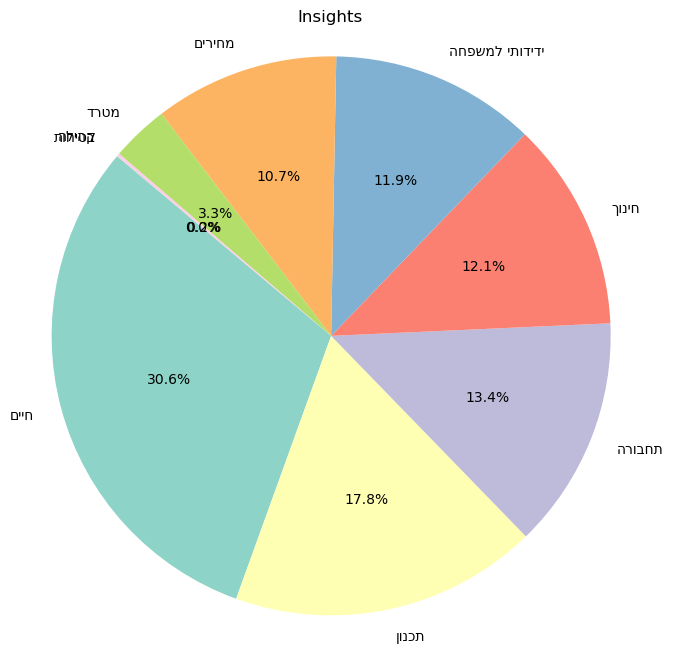

In [34]:
insight_cnt = insight.insight_category.value_counts()
insight_cnt.index = [ins[::-1] for ins in insight_cnt.index]
insight_cnt = insight_cnt.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(insight_cnt, labels=insight_cnt.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Insights')
plt.axis('equal')
plt.show()

## Working on Tags

In [35]:
tags.tag_category.unique()

array(['דירוג בתי ספר', 'התאמה לחילונים', 'התאמה לדתיים', 'ביטחון',
       'קירבה לפארקים', 'רחוב שקט', 'קירבה לפארק כלבים', 'התאמה למשפחות',
       'lightRail', 'commute'], dtype=object)

In [36]:
d = {
    "lightRail":"קירבה לרכבת קלה",
    "commute":"נגישות תחבורה ציבורית"
}
tags.tag_category = tags.tag_category.replace(d)

In [37]:
tags.tag_category.unique()

array(['דירוג בתי ספר', 'התאמה לחילונים', 'התאמה לדתיים', 'ביטחון',
       'קירבה לפארקים', 'רחוב שקט', 'קירבה לפארק כלבים', 'התאמה למשפחות',
       'קירבה לרכבת קלה', 'נגישות תחבורה ציבורית'], dtype=object)

In [38]:
tags.tag_value.unique()

array([ 0.,  1., nan,  5.,  7.,  2.,  3.,  4.])

In [39]:
len(tags)

67126

In [40]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67126 entries, 0 to 18949
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            67126 non-null  object 
 1   tag_category  67126 non-null  object 
 2   tag_value     60414 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [41]:
tags.describe()

,tag_value
count,60414.000000
mean,3.015543
std,2.416659
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,7.000000


In [42]:
count_per_category = tags.groupby(['tag_category', 'tag_value'])['id'].nunique().reset_index(name='count')
count_per_category_pivot = count_per_category.pivot_table(index='tag_category', columns='tag_value', values=tags.columns[2])
count_per_category_pivot

tag_value,0.0,1.0,2.0,3.0,4.0,5.0,7.0
tag_category,,,,,,,
דירוג בתי ספר,2785.0,1925.0,397.0,788.0,153.0,662.0,NaN
התאמה לדתיים,1572.0,1815.0,200.0,559.0,52.0,2512.0,NaN
התאמה לחילונים,1826.0,1832.0,480.0,1140.0,272.0,1160.0,NaN
התאמה למשפחות,1535.0,1860.0,1421.0,1041.0,NaN,854.0,NaN
נגישות תחבורה ציבורית,NaN,NaN,NaN,NaN,NaN,NaN,6709.0
קירבה לפארק כלבים,1726.0,NaN,NaN,NaN,NaN,4983.0,NaN
קירבה לפארקים,1922.0,2077.0,1190.0,811.0,164.0,547.0,NaN
קירבה לרכבת קלה,524.0,797.0,845.0,109.0,NaN,4436.0,NaN
רחוב שקט,1318.0,265.0,478.0,173.0,NaN,4476.0,NaN


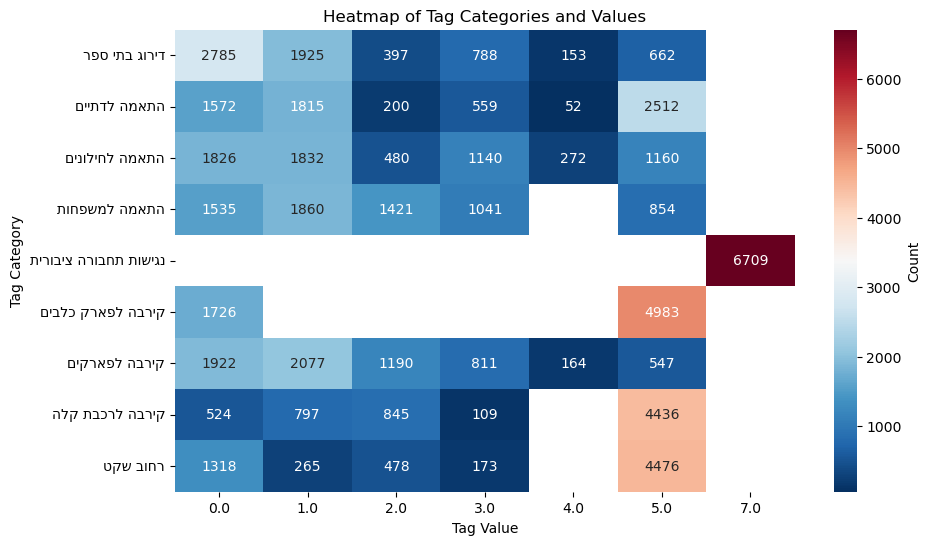

In [43]:
count_per_category_pivot.index = [tag[::-1] for tag in count_per_category_pivot.index]

plt.figure(figsize=(10, 6))
sns.heatmap(count_per_category_pivot, cmap='RdBu_r', annot=True, fmt=".0f", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Tag Categories and Values')
plt.xlabel('Tag Value')
plt.ylabel('Tag Category')
plt.show()

In [44]:
print(len(tags))

67126


In [45]:
# getting indices without certain values that are most commonly null
slices = np.where(
    ~(
        (tags.tag_category.str.contains("נגישות תחבורה ציבורית|קירבה לפארק כלבים|ביטחון"))|
        (tags.tag_value == 4) |
        (tags.tag_value == 7)
    )
)

In [46]:
tags_new = tags.iloc[slices]

In [47]:
len(tags_new)

46351

In [48]:
tags_new.head()

,id,tag_category,tag_value
0,gBxSkU3fU6h,דירוג בתי ספר,0.0
1,gBxSkU3fU6h,התאמה לחילונים,0.0
2,gBxSkU3fU6h,התאמה לדתיים,1.0
4,gBxSkU3fU6h,קירבה לפארקים,1.0
5,gBxSkU3fU6h,רחוב שקט,0.0


In [49]:
tags_new = pd.DataFrame(tags_new)

def fill_up(x):
    if x<4:
        x+=1
    return x

tags_new.tag_value =  tags_new.tag_value.apply(fill_up)

In [50]:
tags_new.head()

,id,tag_category,tag_value
0,gBxSkU3fU6h,דירוג בתי ספר,1.0
1,gBxSkU3fU6h,התאמה לחילונים,1.0
2,gBxSkU3fU6h,התאמה לדתיים,2.0
4,gBxSkU3fU6h,קירבה לפארקים,2.0
5,gBxSkU3fU6h,רחוב שקט,1.0


In [51]:
tags_new.tag_value.unique()

array([1., 2., 5., 3., 4.])

In [52]:
 tags_new.isna().sum()

id              0
tag_category    0
tag_value       0
dtype: int64

In [53]:
tags_new.describe()

,tag_value
count,46351.000000
mean,3.007918
std,1.607548
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5.000000


In [54]:
tags_new.groupby("tag_category")["tag_value"].count()

tag_category
דירוג בתי ספר      6560
התאמה לדתיים       6661
התאמה לחילונים     6441
התאמה למשפחות      6714
קירבה לפארקים      6550
קירבה לרכבת קלה    6712
רחוב שקט           6713
Name: tag_value, dtype: int64

In [55]:
count_per_category = tags_new.groupby(['tag_category', 'tag_value'])['id'].nunique().reset_index(name='count')
count_per_category_pivot = count_per_category.pivot_table(index='tag_category', columns='tag_value', values=tags_new.columns[2])
count_per_category_pivot

tag_value,1.0,2.0,3.0,4.0,5.0
tag_category,,,,,
דירוג בתי ספר,2785.0,1925.0,397.0,788.0,662.0
התאמה לדתיים,1572.0,1815.0,200.0,559.0,2512.0
התאמה לחילונים,1826.0,1832.0,480.0,1140.0,1160.0
התאמה למשפחות,1535.0,1860.0,1421.0,1041.0,854.0
קירבה לפארקים,1922.0,2077.0,1190.0,811.0,547.0
קירבה לרכבת קלה,524.0,797.0,845.0,109.0,4436.0
רחוב שקט,1318.0,265.0,478.0,173.0,4476.0


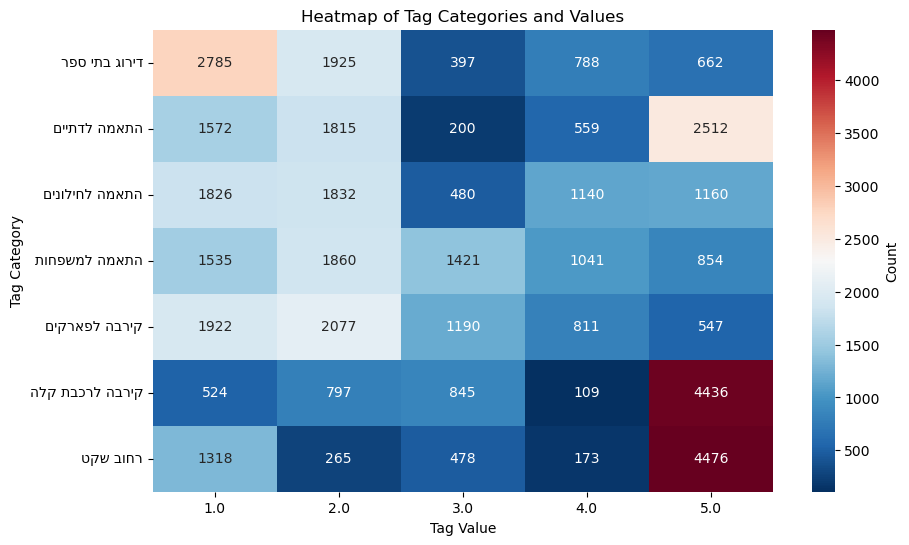

In [56]:
count_per_category_pivot.index = [tag[::-1] for tag in count_per_category_pivot.index]

plt.figure(figsize=(10, 6))
sns.heatmap(count_per_category_pivot, cmap='RdBu_r', annot=True, fmt=".0f", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Tag Categories and Values')
plt.xlabel('Tag Value')
plt.ylabel('Tag Category')
plt.show()

In [57]:
tags_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46351 entries, 0 to 18948
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            46351 non-null  object 
 1   tag_category  46351 non-null  object 
 2   tag_value     46351 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [58]:
tags_cnt = tags_new.groupby("id")["id"].count().reset_index(name="cnt")

In [59]:
tags_cnt

,id,cnt
0,01gY5jZdvnx,7
1,05qEzmeV3i5,7
2,06DrocbQ1Vc,7
3,07kcgafHGb5,7
4,0920RrHInWb,7
...,...,...
6704,zrYhBELIGYW,7
6705,zrjA1hMhXUn,7
6706,zs6gMHptcPg,20
6707,zwxdRaD0Y4K,7


In [60]:
tags_cnt[tags_cnt["cnt"]>7]

,id,cnt
841,bfRH0X1q9YO,8
3568,g0umkhkigKb,13
5134,iaEelLnKjRE,9
6685,y5dN85u5KYU,14
6706,zs6gMHptcPg,20


In [61]:
tags_cnt[tags_cnt["cnt"]<7]

,id,cnt
23,1MvbsnlybEM,6
58,4K5W8vhsdPr,6
97,7gTwtubhs0h,5
240,LT1m7FBJA9d,4
260,NBKwMKhOtN3,5
...,...,...
6583,pyyqVSxk15Q,5
6591,qa0Kpoj8RI7,5
6596,qtdJ7YKPBdB,5
6669,wBBBqE23aiL,6


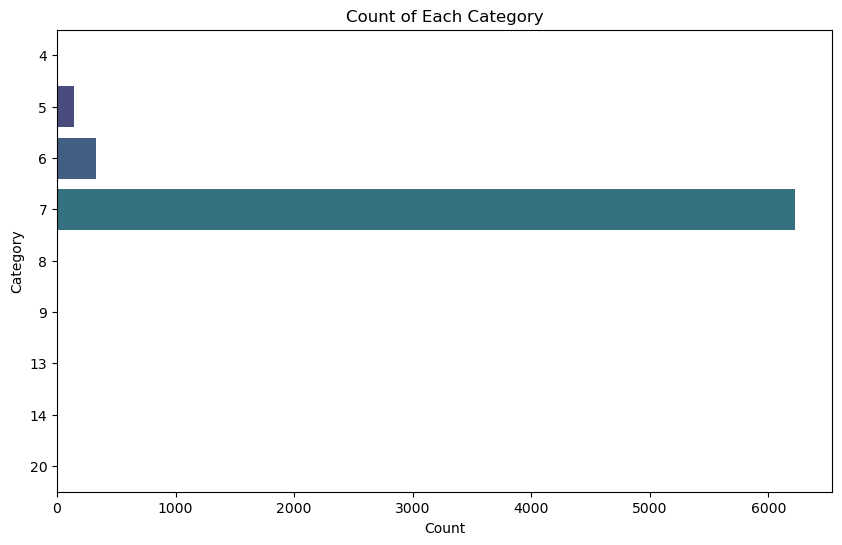

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(y='cnt', data=tags_cnt, palette='viridis')
plt.title('Count of Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [63]:
tags_cnt = tags_cnt[tags_cnt.cnt == 7]

In [64]:
tags_cnt

,id,cnt
0,01gY5jZdvnx,7
1,05qEzmeV3i5,7
2,06DrocbQ1Vc,7
3,07kcgafHGb5,7
4,0920RrHInWb,7
...,...,...
6703,zXGrXxHoaAx,7
6704,zrYhBELIGYW,7
6705,zrjA1hMhXUn,7
6707,zwxdRaD0Y4K,7


In [65]:
tags_new = tags_new.merge(
    tags_cnt,
    how="inner",
    on = "id"
)[["id","tag_category","tag_value"]]

In [66]:
tags_new

,id,tag_category,tag_value
0,gBxSkU3fU6h,דירוג בתי ספר,1.0
1,gBxSkU3fU6h,התאמה לחילונים,1.0
2,gBxSkU3fU6h,התאמה לדתיים,2.0
3,gBxSkU3fU6h,קירבה לפארקים,2.0
4,gBxSkU3fU6h,רחוב שקט,1.0
...,...,...,...
43570,gU6gV1DFpep,התאמה לדתיים,5.0
43571,gU6gV1DFpep,קירבה לפארקים,1.0
43572,gU6gV1DFpep,רחוב שקט,5.0
43573,gU6gV1DFpep,התאמה למשפחות,2.0


In [67]:
print(f"Apartments before: {len(apartments)}")
print(f"Apartments after: {len(tags_cnt)}")
print(f"Apartments dropped: {len(apartments) - len(tags_cnt)}")

Apartments before: 6710
Apartments after: 6225
Apartments dropped: 485


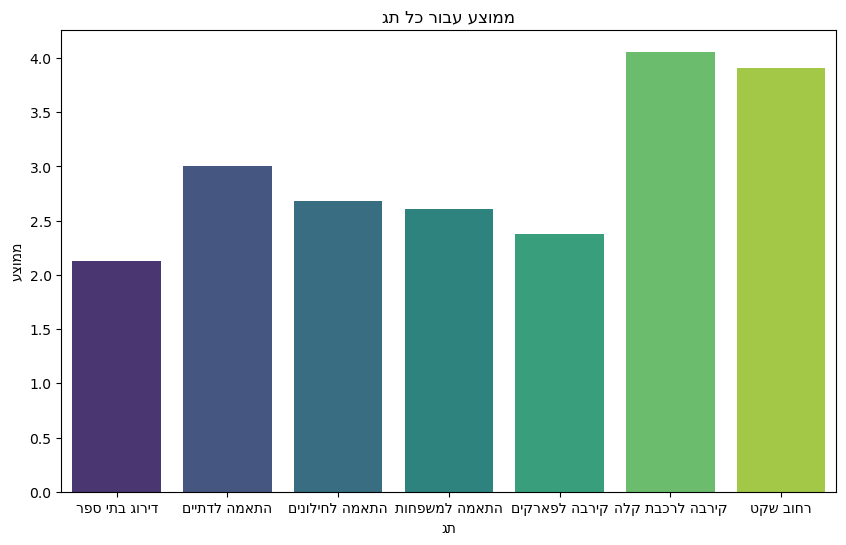

In [68]:
avg_tags = tags_new.groupby("tag_category")["tag_value"].mean().reset_index(name="avg")
avg_tags.tag_category = [tag[::-1] for tag in avg_tags.tag_category]
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_tags.tag_category, y=avg_tags.avg, data=avg_tags, palette='viridis')
plt.title('ממוצע עבור כל תג'[::-1])
plt.xlabel('תג'[::-1])
plt.ylabel('ממוצע'[::-1])
plt.show()

## Filter all tables to return the relevant apartments

In [69]:
tags_ap_ids = tags_new[["id"]]

##### Tags

In [70]:
tags_df = tags_new
tags_df.head(10)

,id,tag_category,tag_value
0,gBxSkU3fU6h,דירוג בתי ספר,1.0
1,gBxSkU3fU6h,התאמה לחילונים,1.0
2,gBxSkU3fU6h,התאמה לדתיים,2.0
3,gBxSkU3fU6h,קירבה לפארקים,2.0
4,gBxSkU3fU6h,רחוב שקט,1.0
5,gBxSkU3fU6h,התאמה למשפחות,1.0
6,gBxSkU3fU6h,קירבה לרכבת קלה,5.0
7,kk7wJwtf1uL,דירוג בתי ספר,3.0
8,kk7wJwtf1uL,התאמה לחילונים,3.0
9,kk7wJwtf1uL,התאמה לדתיים,3.0


In [71]:
d = {
    "דירוג בתי ספר":"school",
    "התאמה לחילונים":"secular",
    "התאמה לדתיים":"religious",
    "קירבה לפארקים":"parks",
    "רחוב שקט":"quiet_street",
    "התאמה למשפחות":"families",
    "קירבה לרכבת קלה":"light_trail"
}
tags_df.tag_category.replace(d, inplace=True)

##### Apartments

In [72]:
apartments_df = apartments.merge(
    tags_ap_ids,
    how="inner",
    on="id"
)
apartments_df = apartments_df.drop_duplicates()
apartments_df.head()

,id,lat,lng,create_date,address,floor,deal_type,beds,price,size_m2,condition,url
0,ieVNwuOX98B,32.078710,34.781594,2023-12-20 10:26:49,"מאנה 15, תל אביב יפו",2,להשכרה,3,10000,70,כמו חדש,https://www.madlan.co.il/listings/ieVNwuOX98B
7,kRYP2kIMVho,32.093788,34.799702,2023-12-20 10:35:53,"בבלי 6, תל אביב יפו",3,להשכרה,5,12300,120,משופץ,https://www.madlan.co.il/listings/kRYP2kIMVho
14,bk4LlhcSrQI,32.089574,34.796605,2023-12-20 11:02:39,"אלוני ניסים 13, תל אביב יפו",14,להשכרה,4,13000,170,כמו חדש,https://www.madlan.co.il/listings/bk4LlhcSrQI
21,cTRw7SDpf1E,32.046710,34.809844,2023-12-20 11:25:50,"שדרות ששת הימים 13, תל אביב יפו",0,להשכרה,3,4800,85,משופץ,https://www.madlan.co.il/listings/cTRw7SDpf1E
28,N0okrcZMZ88,32.057983,34.771044,2023-12-20 12:27:07,"הרצל 61, תל אביב יפו",1,להשכרה,1,3200,19,משופץ,https://www.madlan.co.il/listings/N0okrcZMZ88


In [73]:
import re

def addCity(address):
    text_after_last_comma = address.rsplit(',', maxsplit=1)[-1].strip()

    match = re.match(r'.*\d+\s+(.*)', text_after_last_comma)
    if match:
        return match.group(1).strip()
    return text_after_last_comma

apartments_df["city"] = apartments_df["address"].apply(addCity)


In [74]:
column_to_move = 'city'
position = apartments_df.columns.get_loc('address') + 1
apartments_df.insert(position, column_to_move, apartments_df.pop(column_to_move))

In [75]:
apartments_df.city.unique()

array(['תל אביב יפו', 'ירושלים', 'מבשרת ציון', 'אורה', 'גבעת זאב',
       'כוכב יעקב', 'בית זית', 'חיפה'], dtype=object)

In [76]:
apartments_df.describe()

,lat,lng,floor,beds,price,size_m2
count,6225.000000,6225.000000,6225.000000,6225.000000,6.225000e+03,6.225000e+03
mean,32.175916,34.972882,3.072450,3.688032,2.781329e+06,8.424975e+02
std,0.396271,0.179473,4.081007,1.481904,6.249536e+06,5.640141e+04
min,31.719673,34.746360,-1.000000,0.000000,8.000000e+01,-1.200000e+02
25%,31.789202,34.790308,1.000000,3.000000,9.300000e+03,7.000000e+01
50%,32.081720,34.982507,2.000000,4.000000,1.990000e+06,9.500000e+01
75%,32.775645,35.186995,4.000000,4.000000,3.850000e+06,1.230000e+02
max,32.841334,35.257817,40.000000,15.000000,3.500000e+08,4.450000e+06


In [77]:
len(apartments_df)

6225

##### Insights

In [78]:
insights_df = insight.merge(
    tags_ap_ids,
    how="inner",
    on="id",
)
insights_df = insights_df.drop_duplicates()
insights_df.head(10)

,id,insight_category,insight_value
0,gBxSkU3fU6h,חיים,"בילויים, קניות וסידורים במרחק הליכה קצרה"
7,gBxSkU3fU6h,מטרד,הקמת המטרו תגרום למטרדי בנייה באזור
14,gBxSkU3fU6h,תכנון,רובע עירוני חדש יקום בפי גלילות
21,gBxSkU3fU6h,תחבורה,גשר מתוכנן יקשר לאזורי חן ולים
28,gBxSkU3fU6h,תחבורה,צפוי שיפור בשבילי האופניים באזור
35,gBxSkU3fU6h,חינוך,בית הספר הסמוך לדירה מעולה
42,gBxSkU3fU6h,ידידותי למשפחה,סביבה מתאימה למשפחות
49,gBxSkU3fU6h,חיים,Limited park access
56,gBxSkU3fU6h,תכנון,פרויקט פינוי בינוי מתוכנן בסביבה
63,gBxSkU3fU6h,חיים,רחוב מגורים שקט


##### Images

In [79]:
images_df = images.merge(
    tags_ap_ids,
    how="inner",
    on="id",
)
images_df = images_df.drop_duplicates()
images_df.head()

,id,image_url
0,gBxSkU3fU6h,https://images2.madlan.co.il/t:nonce:v=2;resiz...
7,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
14,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
21,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...
28,ct0ECL7b1HG,https://images2.madlan.co.il/t:nonce:v=2;resiz...


In [80]:
print(images_df.image_url.iloc[0])

https://images2.madlan.co.il/t:nonce:v=2;resize:height=640;convert:type=webp/bulletin/gBxSkU3fU6h/clILWm.jpg


In [81]:
def getImageId(url):
    match = re.match(r'.*/(.*\.jpg)', url)
    if match:
        return match.group(1).strip()

images_df["image_id"] = images_df.image_url.apply(getImageId).str[:-4]

In [82]:
images_df.head()

,id,image_url,image_id
0,gBxSkU3fU6h,https://images2.madlan.co.il/t:nonce:v=2;resiz...,clILWm
7,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,ejlBQ
14,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,NgYK2
21,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bdKyIF
28,ct0ECL7b1HG,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bGLTuZ


In [83]:
images_df.describe()

,id,image_url,image_id
count,34730,34730,32639
unique,5035,34730,32639
top,i2m47TUlLSw,https://images2.madlan.co.il/t:nonce:v=2;resiz...,clILWm
freq,46,1,1


In [84]:
print(images_df.image_id.isnull().sum())

2091


In [85]:
images_df = images_df[~images_df["image_id"].isnull()]

In [86]:
images_df.head()

,id,image_url,image_id
0,gBxSkU3fU6h,https://images2.madlan.co.il/t:nonce:v=2;resiz...,clILWm
7,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,ejlBQ
14,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,NgYK2
21,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bdKyIF
28,ct0ECL7b1HG,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bGLTuZ


## Exporting to JSON (preparing data for MongoDB):

#### For Sale

In [87]:
for_sale = apartments_df.iloc[np.where(apartments_df.deal_type=="למכירה")]

In [88]:
for_sale.head()

,id,lat,lng,create_date,address,city,floor,deal_type,beds,price,size_m2,condition,url
2898,d3dbVQErVCp,32.119048,34.791080,2024-01-11 12:11:23,"אשכול לוי 101, תל אביב יפו",תל אביב יפו,6,למכירה,4,5290000,106,משופץ,https://www.madlan.co.il/listings/d3dbVQErVCp
2912,co745SgbSvo,32.076425,34.779591,2024-01-11 13:22:39,"השופטים 16, תל אביב יפו",תל אביב יפו,4,למכירה,2,4000000,81,ישן,https://www.madlan.co.il/listings/co745SgbSvo
2947,hZ5vNRFKDr8,32.063997,34.772231,2024-01-11 13:53:26,"אחד העם 34, תל אביב יפו",תל אביב יפו,5,למכירה,3,9500000,160,חדש,https://www.madlan.co.il/listings/hZ5vNRFKDr8
2954,bMWmA4bbRo3,32.059006,34.798495,2024-01-11 14:01:17,"לה גארדיה 64, תל אביב יפו",תל אביב יפו,7,למכירה,4,4980000,116,כמו חדש,https://www.madlan.co.il/listings/bMWmA4bbRo3
2961,hTGedzNQG2f,32.124594,34.800601,2024-01-11 14:11:18,"אחימאיר אבא 14, תל אביב יפו",תל אביב יפו,13,למכירה,4,7250000,105,חדש,https://www.madlan.co.il/listings/hTGedzNQG2f


In [89]:
tags_df.head()

,id,tag_category,tag_value
0,gBxSkU3fU6h,school,1.0
1,gBxSkU3fU6h,secular,1.0
2,gBxSkU3fU6h,religious,2.0
3,gBxSkU3fU6h,parks,2.0
4,gBxSkU3fU6h,quiet_street,1.0


In [90]:
tags_df.tag_category.unique()

array(['school', 'secular', 'religious', 'parks', 'quiet_street',
       'families', 'light_trail'], dtype=object)

In [91]:
insights_df.head()

,id,insight_category,insight_value
0,gBxSkU3fU6h,חיים,"בילויים, קניות וסידורים במרחק הליכה קצרה"
7,gBxSkU3fU6h,מטרד,הקמת המטרו תגרום למטרדי בנייה באזור
14,gBxSkU3fU6h,תכנון,רובע עירוני חדש יקום בפי גלילות
21,gBxSkU3fU6h,תחבורה,גשר מתוכנן יקשר לאזורי חן ולים
28,gBxSkU3fU6h,תחבורה,צפוי שיפור בשבילי האופניים באזור


In [92]:
images_df.head()

,id,image_url,image_id
0,gBxSkU3fU6h,https://images2.madlan.co.il/t:nonce:v=2;resiz...,clILWm
7,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,ejlBQ
14,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,NgYK2
21,kk7wJwtf1uL,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bdKyIF
28,ct0ECL7b1HG,https://images2.madlan.co.il/t:nonce:v=2;resiz...,bGLTuZ


In [93]:
combined_for_sale = for_sale.copy()

# Merge tags
tags_combined = tags_df.groupby('id').apply(lambda x: x[['tag_category', 'tag_value']].to_dict(orient='records')).reset_index(name='tags')
combined_for_sale = combined_for_sale.merge(tags_combined, on='id', how='left')

# Merge insights
insights_combined = insights_df.groupby('id').apply(lambda x: x[['insight_category', 'insight_value']].to_dict(orient='records')).reset_index(name='insights')
combined_for_sale = combined_for_sale.merge(insights_combined, on='id', how='left')

# Merge images
images_combined = images_df.groupby('id').apply(lambda x: x[['image_url', 'image_id']].to_dict(orient='records')).reset_index(name='images')
combined_for_sale = combined_for_sale.merge(images_combined, on='id', how='left')

# Convert to JSON without escaping slashes
combined_json = combined_for_sale.to_json(orient='records', force_ascii=False, date_format='iso').replace('\\/', '/')

In [94]:
# Write the JSON string to a file
with open('for_sale_apartments.json', 'w', encoding='utf-8') as file:
    file.write(combined_json)

#### For Rent

In [95]:
for_rent = apartments_df.iloc[np.where(apartments_df.deal_type=="להשכרה")]

In [96]:
combined_for_rent = for_rent.copy()

# Merge tags
tags_combined = tags_df.groupby('id').apply(lambda x: x[['tag_category', 'tag_value']].to_dict(orient='records')).reset_index(name='tags')
combined_for_rent = combined_for_rent.merge(tags_combined, on='id', how='left')

# Merge insights
insights_combined = insights_df.groupby('id').apply(lambda x: x[['insight_category', 'insight_value']].to_dict(orient='records')).reset_index(name='insights')
combined_for_rent = combined_for_rent.merge(insights_combined, on='id', how='left')

# Merge images
images_combined = images_df.groupby('id').apply(lambda x: x[['image_url', 'image_id']].to_dict(orient='records')).reset_index(name='images')
combined_for_rent = combined_for_rent.merge(images_combined, on='id', how='left')

# Convert to JSON without escaping slashes
combined_json = combined_for_rent.to_json(orient='records', force_ascii=False, date_format='iso').replace('\\/', '/')

In [97]:
# Write the JSON string to a file
with open('for_rent_apartments.json', 'w', encoding='utf-8') as file:
    file.write(combined_json)